In [1]:
# to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
import pydotplus
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

# Support Vector Machine

In [3]:
#reading and cleaning data
churn_df=pd.read_csv("train.csv")
mydata = churn_df.drop(['review_title','review_description','user_name','designation','winery','country'], axis=1)
churn_df = mydata.dropna()
churn_df.head()

,points,price,province,region_1,region_2,variety
1,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,Red Blend
6,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Red Blend
7,90,50.0,California,Sonoma County,Sonoma,Zinfandel
8,91,48.0,Oregon,McMinnville,Willamette Valley,Pinot Noir
10,90,18.0,California,Carneros,Napa-Sonoma,Sauvignon Blanc


In [4]:
# replace function for wine varieties
def replace(str1,num):
    churn_df['variety'].replace(
    to_replace=[str1],
    value=num,
    inplace=True
    )

In [5]:
# converting into unique numeric values for SVM
replace("Chardonnay",0)
replace("Red Blend",1)
replace("Nebbiolo",2)
replace("Bordeaux-style White Blend",3)
replace("Malbec",4)
replace("Cabernet Sauvignon",5)
replace("Zinfandel",6)
replace("Pinot Noir",7)
replace("Sauvignon Blanc",6)
replace("Gamay",9)
replace("Grüner Veltliner",10)
replace("Bordeaux-style Red Blend",11)
replace("Sangiovese",12)
replace("Syrah",13)
replace("White Blend",14)
replace("Cabernet Franc",15)
replace("Portuguese Red",16)
replace("Rhône-style Red Blend",17)
replace("Rosé",18)
replace("Champagne Blend",19)
replace("Merlot",20)
replace("Riesling",21)                  
replace("Sparkling Blend",22)
replace("Pinot Grigio",23)
replace("Tempranillo",24)
replace("Pinot Gris",25)
replace("Portuguese White",26)
replace("Gewürztraminer",27)

In [31]:
features_df=churn_df[['points',"price"]]
X = np.asanyarray(features_df)
X[0:5]
churn_df['variety']=churn_df['variety'].astype('int')
y = np.asanyarray(churn_df['variety'])
y[0:5]

array([1, 1, 6, 7, 6])

In [32]:
#train / test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 4)
print("Trained Set :",X_train.shape,y_train.shape)
print("Tested Set :",X_test.shape,y_test.shape)

Trained Set : (21476, 3) (21476,)
Tested Set : (14318, 3) (14318,)


In [33]:
#modelling by Using Scikit learn SVM
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
#predicting on the basis of SVM model built
yhat = clf.predict(X_test)
yhat[0:5]

array([ 5, 20,  0,  0,  0])

In [35]:
from sklearn import metrics
print("The Accuracy of the model is : ",metrics.accuracy_score(y_test,yhat))

The Accuracy of the model is :  0.7221679005447689


In [36]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average='weighted')

0.6627183058562175

# Decision Tree Classification:

In [12]:
#constructing Decision Tree Classifier
df = pd.read_csv("train.csv")
my_data = df
my_data = my_data.dropna()

In [13]:
X = my_data[["points","price","province"]]
X[0:5]

,points,price,province
6,91,45.0,Washington
7,90,50.0,California
8,91,48.0,Oregon
10,90,18.0,California
34,92,25.0,Oregon


In [14]:
y = my_data["variety"].values
y[0:5]

array(['Red Blend', 'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc',
       'Chardonnay'], dtype=object)

In [15]:
#preprocessing
le_province = preprocessing.LabelEncoder()
le_province.fit(['Washington','California','Oregon','New York'])
X.iloc[:,2]=le_province.transform(X.iloc[:,2])

In [16]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.4,random_state = 4)

In [17]:
#plotting decision Tree
varTree = DecisionTreeClassifier( criterion = "entropy",max_depth = 4)
varTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
varTree.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
predTree = varTree.predict(test_X)
predTree

array(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', ...,
       'Cabernet Sauvignon', 'Pinot Noir', 'Pinot Noir'], dtype=object)

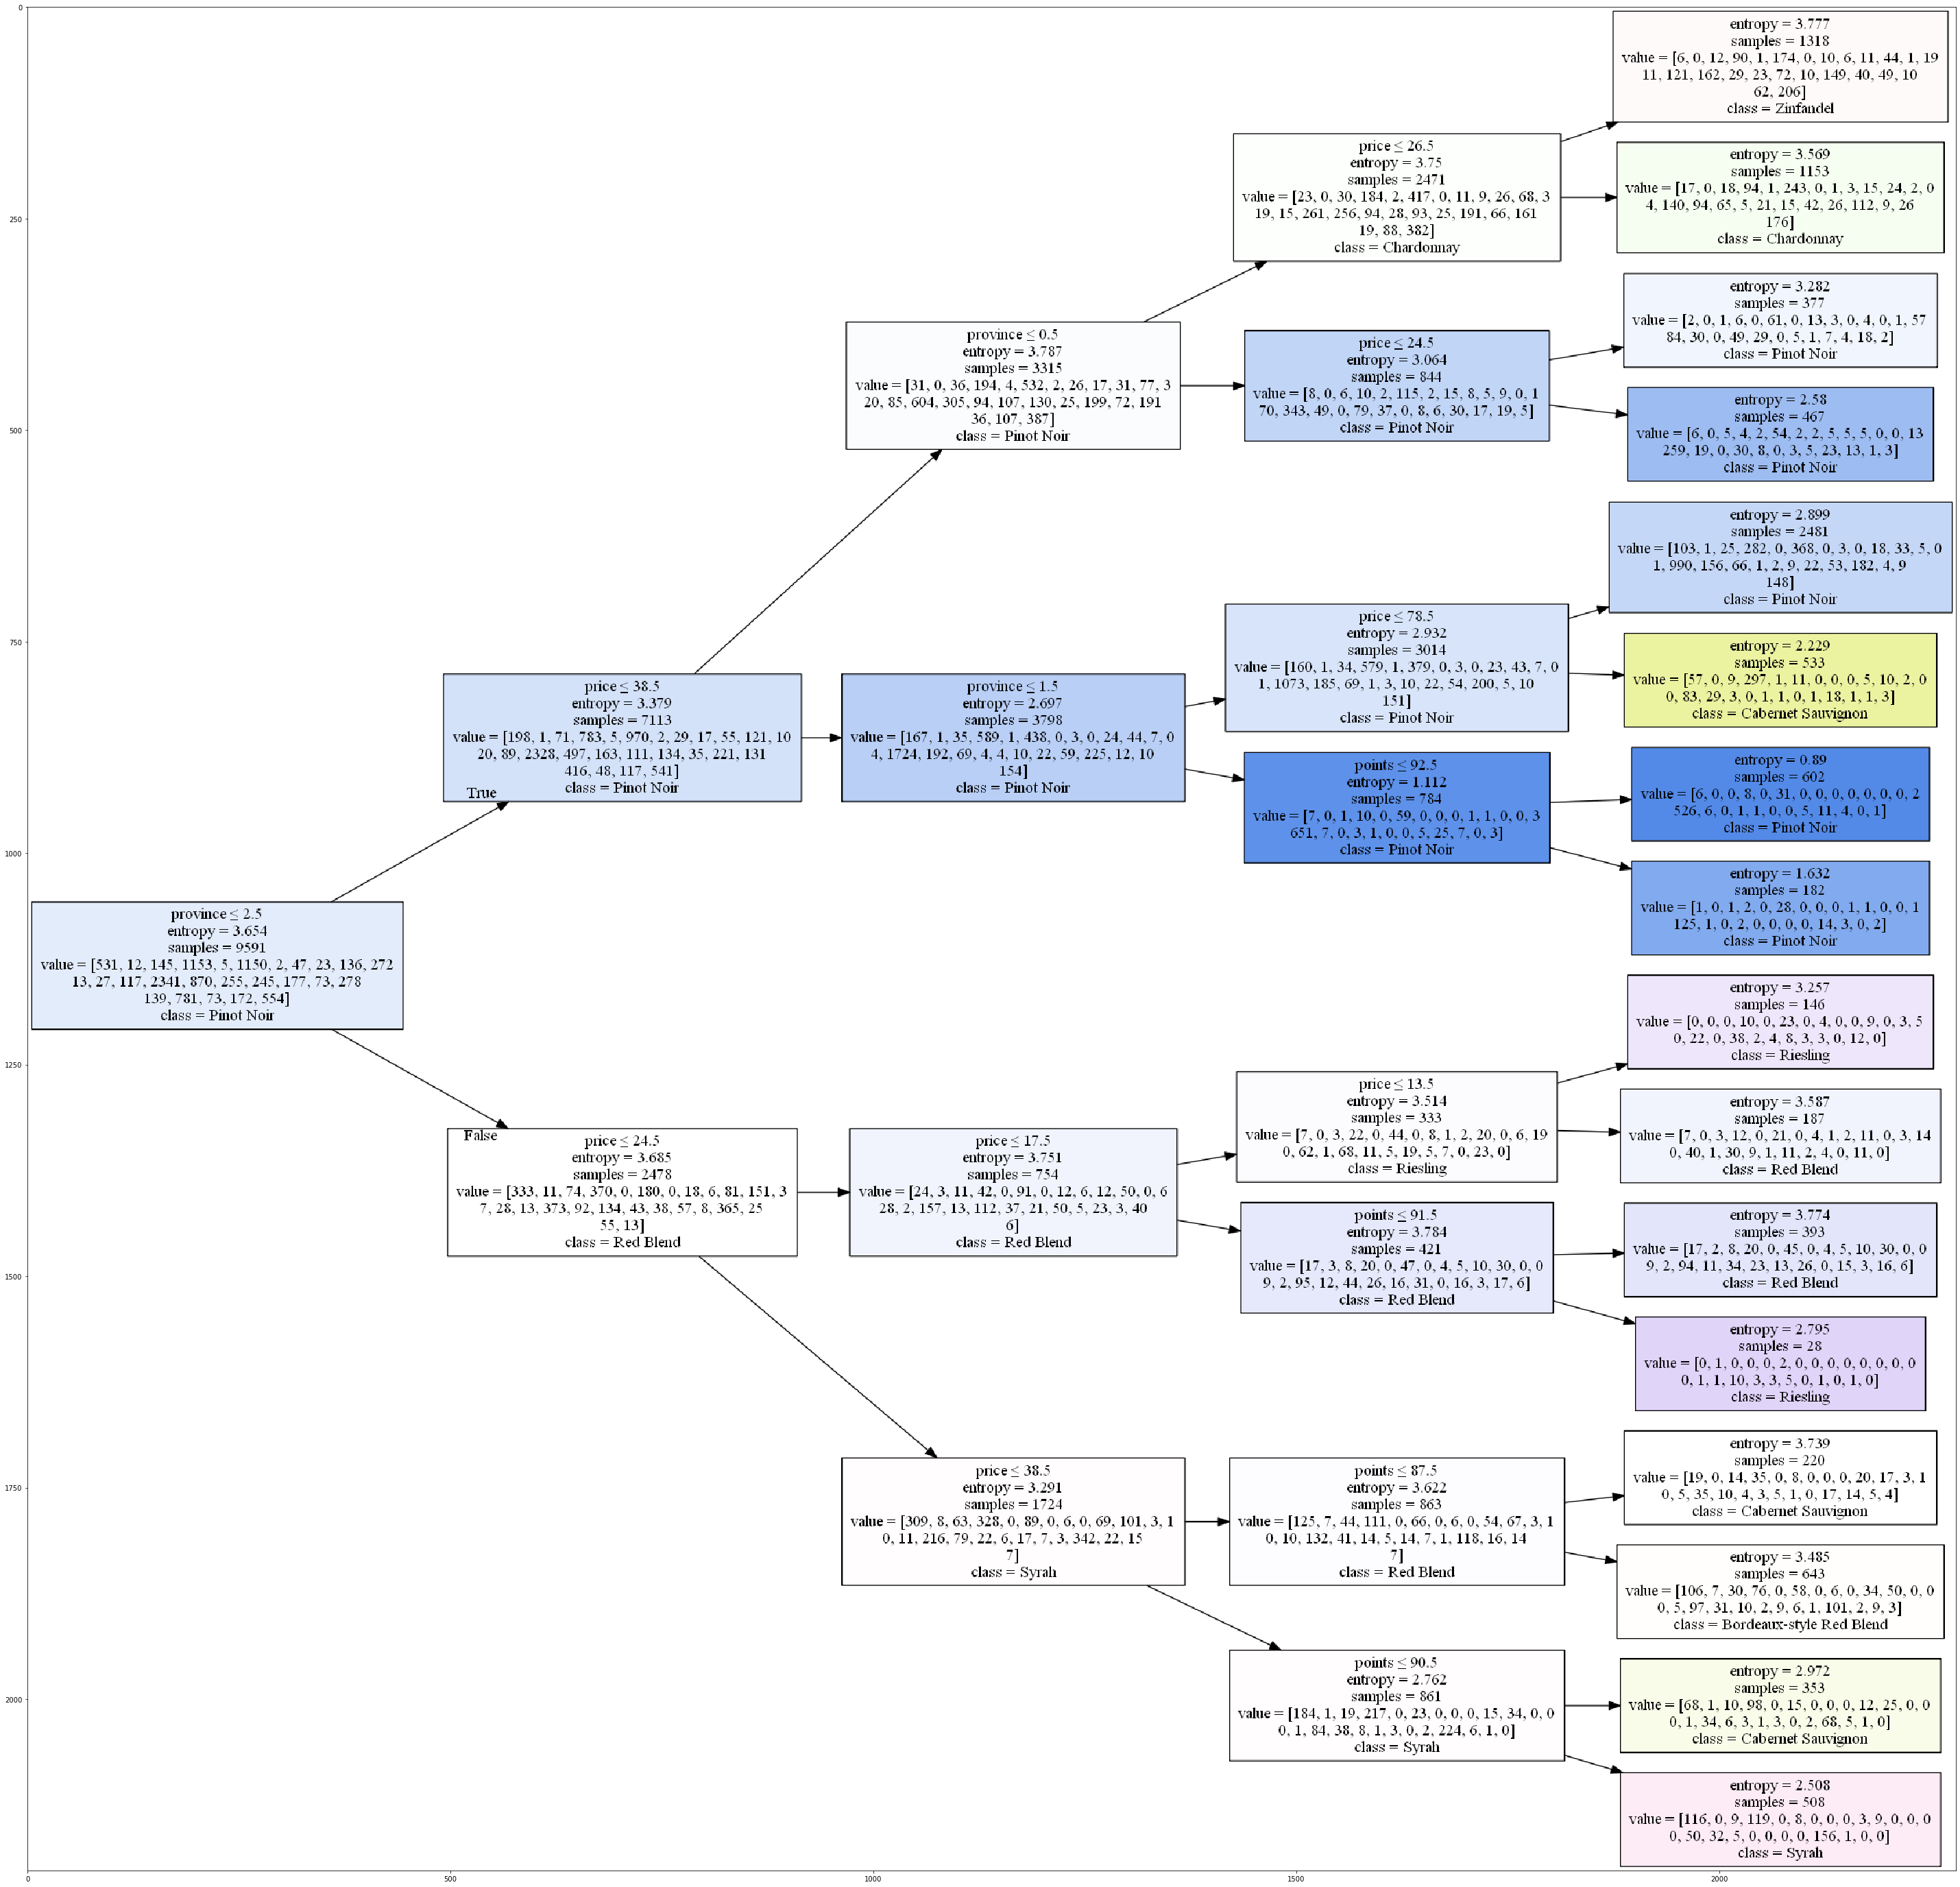

In [20]:
dot_data = StringIO()
filename ="VarTree.png"
featureNames = churn_df.columns[0:3]
targetNames = churn_df["variety"].unique().tolist()
out = tree.export_graphviz(varTree,feature_names = featureNames,out_file =dot_data,class_names = np.unique(train_y),filled = True,special_characters =True,rotate = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100,50))
plt.imshow(img,interpolation ="nearest")
plt.show()

In [21]:
test =pd.read_csv("test.csv")
testdata = df.drop(['review_title','review_description','user_name','designation','winery','country'], axis=1)
testdata2 = testdata.dropna()
test_data = testdata2[["points","price"]]
test_data.head()

,points,price
1,89,15.0
6,91,45.0
7,90,50.0
8,91,48.0
10,90,18.0


In [22]:
yhat2 = clf.predict(test_data)
yhat2[0:5]

array([0, 7, 7, 7, 0])

In [30]:
#writing in the csv file
import pandas as pd
df = pd.read_csv('abc.csv')
new_column = pd.DataFrame({'Predicted Value': yhat2})
df = df.merge(new_column, left_index = True, right_index = True)
df.to_csv('abc.csv', index = False)